In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob


In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

In [3]:


# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2nd/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2nd/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2nd/paper"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print("바위 이미지 resize 완료!")
print("보 이미지 resize 완료!")

1459  images to be resized.
1502  images to be resized.
1444  images to be resized.
가위 이미지 resize 완료!
바위 이미지 resize 완료!
보 이미지 resize 완료!


In [4]:
def load_data(img_path, number_of_data=4405):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2nd"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4405 입니다.
x_train shape: (4405, 112, 112, 3)
y_train shape: (4405,)


In [6]:
def train_val_test_split(ds, ds_size, sd,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # trainning set, validation set, test set 을 동일하게 섞기 위해 seed 를 설정
        ds_shuffled = np.random.RandomState(seed=sd).permutation(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds_shuffled[0:train_size]    
    val_ds = ds_shuffled[train_size:train_size+val_size]
    test_ds = ds_shuffled[train_size+val_size:]
    
    return train_ds, val_ds, test_ds

In [7]:
x_train, x_val, x_test = train_val_test_split(x_train,4405,42)
y_train, y_val, y_test = train_val_test_split(y_train,4405,42)

In [8]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3524, 112, 112, 3)
(440, 112, 112, 3)
(441, 112, 112, 3)


In [9]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3524,)
(440,)
(441,)


라벨:  0


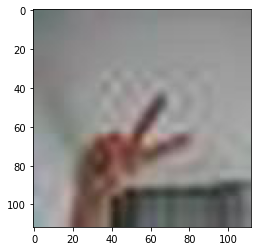

In [10]:
plt.imshow(x_train[3])
print('라벨: ', y_train[3])

라벨:  0


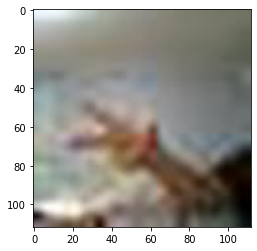

In [11]:
plt.imshow(x_train[1354])
print('라벨: ', y_train[1354])

라벨:  1


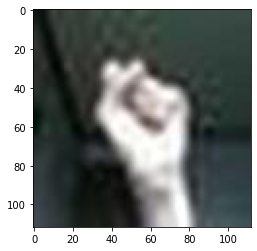

In [12]:
plt.imshow(x_train[2248])
print('라벨: ', y_train[2248])

라벨:  0


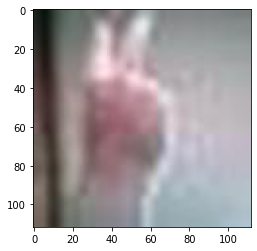

In [13]:
plt.imshow(x_train[3424])
print('라벨: ', y_train[3424])

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                346128    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
111/111 [==============================] - 4s 7ms/step - loss: 4.1343 - accuracy: 0.6737
Epoch 2/10
111/111 [==============================] - 1s 6ms/step - loss: 0.2169 - accuracy: 0.9240
Epoch 3/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0898 - accuracy: 0.9784
Epoch 4/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0841 - accuracy: 0.9776
Epoch 5/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0318 - accuracy: 0.9938
Epoch 6/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0181 - accuracy: 0.9966
Epoch 7/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0840 - accuracy: 0.9756
Epoch 8/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0225 - accuracy: 0.9966
Epoch 9/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0138 - accuracy: 0.9974
Epoch 10/10
111/111 [==============================] - 1s 6ms/step - loss: 0.0034 - accuracy: 1.0000

In [17]:
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

14/14 - 0s - loss: 0.0522 - accuracy: 0.9886
test_loss : 0.05217266082763672
test_accuracy : 0.9886363744735718


In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("최종 test_loss : {}".format(test_loss))
print("최종 test_accuracy : {}".format(test_accuracy))

14/14 - 0s - loss: 0.0471 - accuracy: 0.9909
최종 test_loss : 0.0471150279045105
최종 test_accuracy : 0.9909297227859497


예측확률분포: [0.3741821  0.00419483 0.62162304]
라벨: 0, 예측결과: 2


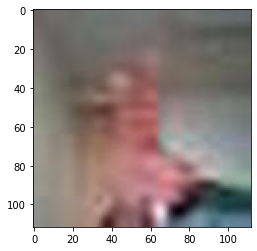

예측확률분포: [0.3741821  0.00419483 0.62162304]
라벨: 0, 예측결과: 2


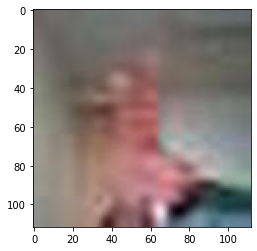

예측확률분포: [1.3921993e-04 5.0982706e-02 9.4887811e-01]
라벨: 1, 예측결과: 2


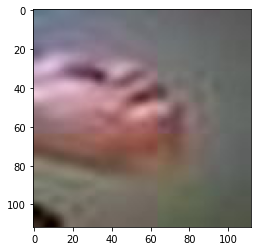

예측확률분포: [9.7656578e-01 6.1153776e-05 2.3373105e-02]
라벨: 1, 예측결과: 0


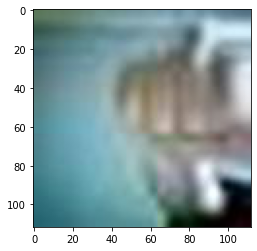

예측확률분포: [1.3921993e-04 5.0982706e-02 9.4887811e-01]
라벨: 1, 예측결과: 2


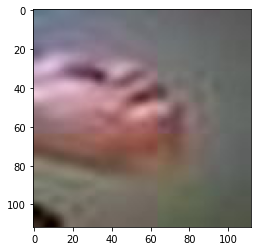

In [19]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모음
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()